# Adapted Wasserstein Distance between Gaussian Process in Discrete Time

This Jupyter notebook demonstrates how to compute the Adapted Wasserstein squared distance 
between two Gaussian processes. This computed distance will be used as a benchmark 
for approximations in future studies.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared

# Define parameters
a, b = 1, 2
var_a, var_b = 1**2, 0.5**2
t = 15

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)
b_vec, B_mat = build_mean_and_cov(t, mean_val=b, var_factor=var_b)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, b_vec, B_mat)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 45.0000
Adapted Wasserstein Distance: 6.7082


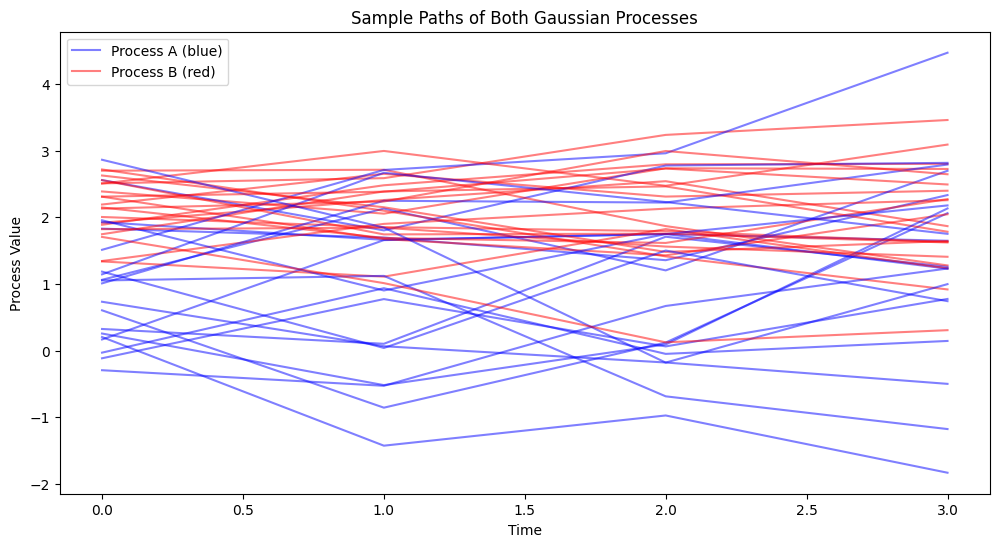

In [5]:
# Generate sample paths
num_samples = 20
np.random.seed(42)

samples_a = np.random.multivariate_normal(a_vec, A_mat, size=num_samples)
samples_b = np.random.multivariate_normal(b_vec, B_mat, size=num_samples)

time_points = np.arange(t)

# Plot sample paths
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.plot(time_points, samples_a[i], color='blue', alpha=0.5)
    plt.plot(time_points, samples_b[i], color='red', alpha=0.5)

plt.xlabel("Time")
plt.ylabel("Process Value")
plt.title("Sample Paths of Both Gaussian Processes")
plt.legend(["Process A (blue)", "Process B (red)"])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Comp_AWD2_Gaussian import build_mean_and_cov, adapted_wasserstein_squared


mean = np.zeros(5)

def nearest_pd(A):
    """Find the nearest positive-definite matrix to A."""
    B = (A + A.T) / 2
    _, s, V = np.linalg.svd(B)
    H = V.T @ np.diag(s) @ V
    A2 = (B + H) / 2
    A3 = (A2 + A2.T) / 2
    # Ensure positive definiteness by adding a small identity matrix if needed.
    if is_pd(A3):
        return A3
    spacing = np.spacing(np.linalg.norm(A))
    I = np.eye(A.shape[0])
    k = 0.5
    while not is_pd(A3):
        A3 += I * spacing * k
        k += 1
    return A3

def is_pd(B):
    """Return True if B is positive-definite."""
    try:
        np.linalg.cholesky(B)
        return True
    except np.linalg.LinAlgError:
        return False


# Covariance Matrix Sigma2:
# - Variances: [25, 5, 16, 3.2, 9] corresponding to std devs: 5, ~2.24, 4, ~1.79, 3.
# - Sparse, extreme off-diagonals: a strong negative tie between X1 and X3 and smaller interactions elsewhere.
Sigma2 = np.array([
    [25,    0,   -20,    0,    1.5],
    [0,     5,     0,  -0.4,    0],
    [-20,   0,    16,    0,   -1.2],
    [0,   -0.4,    0,   3.2,    0],
    [1.5,   0,   -1.2,    0,    9]
])
Sigma2 = (Sigma2 + Sigma2.T) / 2  # ensure symmetry



sigma2_pd = nearest_pd(Sigma2)

# Define parameters
a, b = 1, 2
var_a, var_b = 1**2, 0.5**2
t = 5

# Build mean and covariance matrices for both processes
a_vec, A_mat = build_mean_and_cov(t, mean_val=a, var_factor=var_a)

# Compute adapted Wasserstein squared distance
distance_squared = adapted_wasserstein_squared(a_vec, A_mat, mean, sigma2_pd)
distance = np.sqrt(distance_squared)

print(f"Adapted Wasserstein Squared Distance: {distance_squared:.4f}")
print(f"Adapted Wasserstein Distance: {distance:.4f}")

Adapted Wasserstein Squared Distance: 61.9559
Adapted Wasserstein Distance: 7.8712


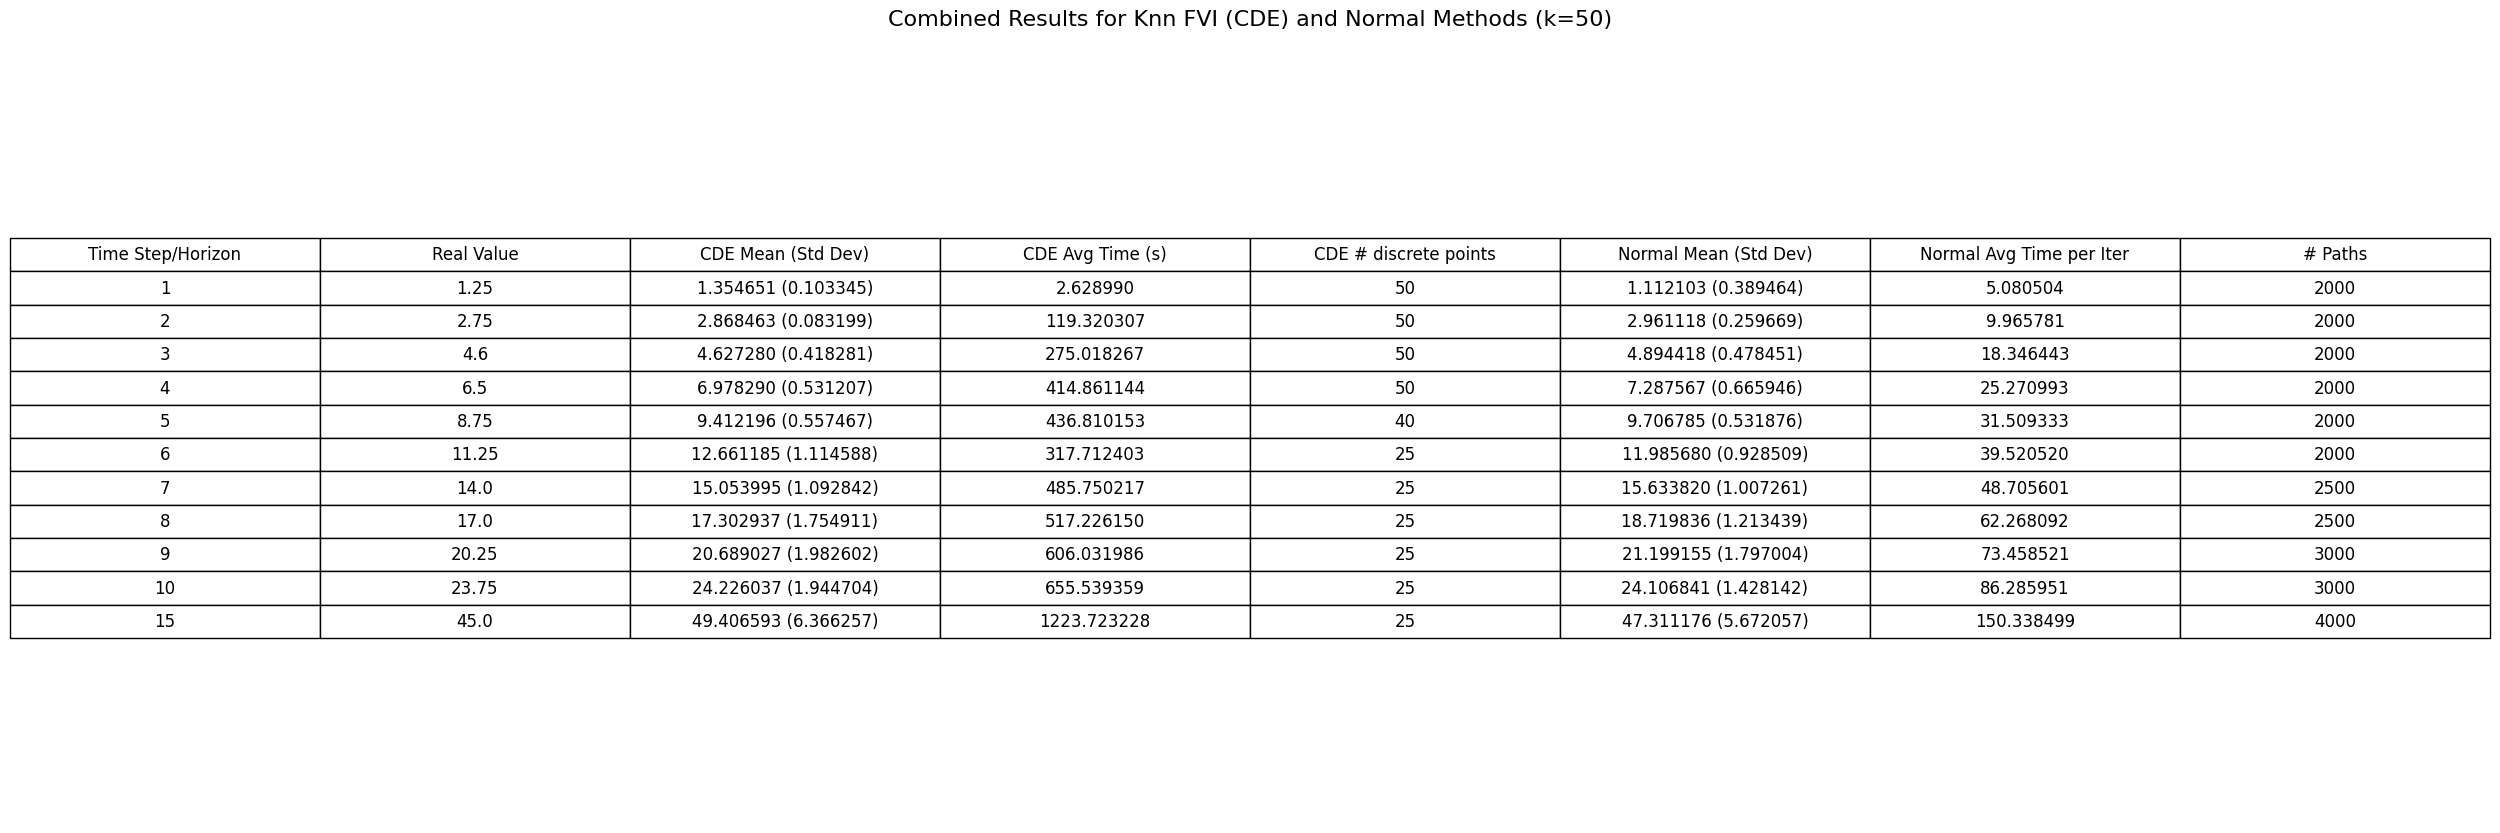

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the combined data
data = {
    "Time Step/Horizon": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
    "Real Value": [1.25, 2.75, 4.6, 6.5, 8.75, 11.25, 14, 17, 20.25, 23.75, 45],
    "CDE Mean (Std Dev)": [
        "1.354651 (0.103345)", "2.868463 (0.083199)", "4.627280 (0.418281)",
        "6.978290 (0.531207)", "9.412196 (0.557467)", "12.661185 (1.114588)",
        "15.053995 (1.092842)", "17.302937 (1.754911)", "20.689027 (1.982602)",
        "24.226037 (1.944704)", "49.406593 (6.366257)"
    ],
    "CDE Avg Time (s)": [
        "2.628990", "119.320307", "275.018267", "414.861144",
        "436.810153", "317.712403", "485.750217", "517.226150",
        "606.031986", "655.539359", "1223.723228"
    ],
    "CDE # discrete points": ["50", "50", "50", "50", "40", "25", "25", "25", "25", "25", "25"],
    "Normal Mean (Std Dev)": [
        "1.112103 (0.389464)", "2.961118 (0.259669)", "4.894418 (0.478451)",
        "7.287567 (0.665946)", "9.706785 (0.531876)", "11.985680 (0.928509)",
        "15.633820 (1.007261)", "18.719836 (1.213439)", "21.199155 (1.797004)",
        "24.106841 (1.428142)", "47.311176 (5.672057)"
    ],
    "Normal Avg Time per Iter": [
        "5.080504", "9.965781", "18.346443", "25.270993", "31.509333",
        "39.520520", "48.705601", "62.268092", "73.458521", "86.285951", "150.338499"
    ],
    "# Paths": ["2000", "2000", "2000", "2000", "2000", "2000", "2500", "2500", "3000", "3000", "4000"]
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(16, 10))
ax.axis('off')

# Create the table
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 loc='center',
                 cellLoc='center')

# Customize font size and scale for high-definition display
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)

# Add a title and note about k=50 for both methods
plt.title("Combined Results for Knn FVI (CDE) and Normal Methods (k=50)", fontsize=16, pad=20)

# Save the image as a high-resolution PNG
plt.savefig('combined_results_table.png', dpi=300, bbox_inches='tight')
plt.show()
